<Axes: xlabel='Feature 1', ylabel='Feature 2'>

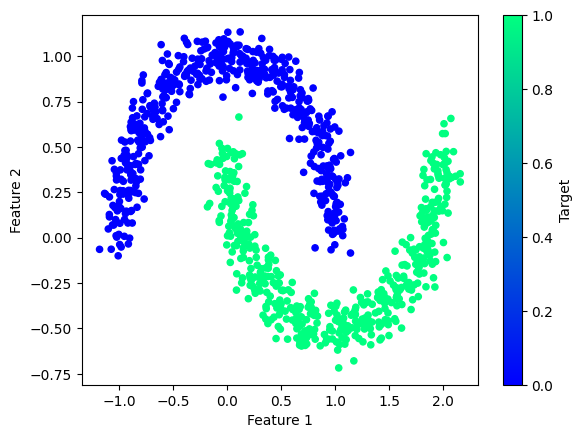

In [1]:
# Import our dependencies
import pandas as pd
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Read the dataset
df_moons = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m18/lesson_2/datasets/moons-data-1.csv")

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [2]:
# Separate data into X and y
X = df_moons.drop("Target", axis=1)
y = df_moons["Target"]

# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Set input nodes to the number of features
input_nodes = len(X.columns)

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=input_nodes))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [4]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 5ms/step - loss: 0.8330 - accuracy: 0.1387
Epoch 2/100
24/24 [==============================] - 0s 9ms/step - loss: 0.8142 - accuracy: 0.1147
Epoch 3/100
24/24 [==============================] - 0s 11ms/step - loss: 0.7974 - accuracy: 0.1133
Epoch 4/100
24/24 [==============================] - 0s 6ms/step - loss: 0.7822 - accuracy: 0.1147
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 0.7687 - accuracy: 0.1187
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 0.7563 - accuracy: 0.1240
Epoch 7/100
24/24 [==============================] - 0s 8ms/step - loss: 0.7452 - accuracy: 0.1293
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7350 - accuracy: 0.1560
Epoch 9/100
24/24 [==============================] - 0s 6ms/step - loss: 0.7264 - accuracy: 0.1653
Epoch 10/100
24/24 [==============================] - 0s 6ms/step - loss: 0.7184 - accuracy: 0.1747
Epoch 11

In [5]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.7065 - accuracy: 0.4080 - 175ms/epoch - 22ms/step
Loss: 0.7064718008041382, Accuracy: 0.40799999237060547


In [6]:
# Create a new neural network model with 6 neurons
nn_model2 = tf.keras.models.Sequential()

nn_model2.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=input_nodes))

nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model2.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7477 - accuracy: 0.4693
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7148 - accuracy: 0.4693
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.4707
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.4853
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.5400
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.6147
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.6680
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.7293
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.7693
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5172 - accuracy: 0.7973
Epoch 11/

In [7]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.2457 - accuracy: 0.8720 - 131ms/epoch - 16ms/step
Loss: 0.24571658670902252, Accuracy: 0.871999979019165
